<div align="center">

  <a href="https://ultralytics.com/yolov5" target="_blank">
    <img width="1024", src="https://raw.githubusercontent.com/ultralytics/assets/main/yolov5/v70/splash.png"></a>


<br>
  <a href="https://bit.ly/yolov5-paperspace-notebook"><img src="https://assets.paperspace.io/img/gradient-badge.svg" alt="Run on Gradient"></a>
  <a href="https://colab.research.google.com/github/ultralytics/yolov5/blob/master/tutorial.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"></a>
  <a href="https://www.kaggle.com/ultralytics/yolov5"><img src="https://kaggle.com/static/images/open-in-kaggle.svg" alt="Open In Kaggle"></a>
<br>

This <a href="https://github.com/ultralytics/yolov5">YOLOv5</a> 🚀 notebook by <a href="https://ultralytics.com">Ultralytics</a> presents simple train, validate and predict examples to help start your AI adventure.<br>We hope that the resources in this notebook will help you get the most out of YOLOv5. Please browse the YOLOv5 <a href="https://docs.ultralytics.com/yolov5">Docs</a> for details, raise an issue on <a href="https://github.com/ultralytics/yolov5">GitHub</a> for support, and join our <a href="https://ultralytics.com/discord">Discord</a> community for questions and discussions!

</div>

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Load your dataset from the CSV file
data = pd.read_csv('datasets/phase2_train_v0/phase2_train_v0.csv')

# Split the data into training and validation sets while maintaining class distribution
train_data, valid_data = train_test_split(data, test_size=0.05, stratify=data['class_label'])

# Save the validation data to a new CSV file
valid_data.to_csv('datasets/phase2_train_v0/validation_dataset.csv', index=False)


In [2]:
import os
import shutil
import pandas as pd

# Load the validation dataset CSV file
validation_data = pd.read_csv('datasets/phase2_train_v0/validation_dataset.csv')

# Set the source directories for images and labels in the train directory
train_images_dir = 'datasets/train/images'
train_labels_dir = 'datasets/train/labels'

# Set the destination directories for images and labels in the val directory
val_images_dir = 'datasets/val/images'
val_labels_dir = 'datasets/val/labels'

# Create the destination directories if they don't exist
os.makedirs(val_images_dir, exist_ok=True)
os.makedirs(val_labels_dir, exist_ok=True)

# Iterate through each row in the validation dataset
for index, row in validation_data.iterrows():
    img_filename = row['img_fName']
    label_filename = os.path.splitext(img_filename)[0] + '.txt'

    # Copy the image file from train/images to val/images
    src_img_path = os.path.join(train_images_dir, img_filename)
    dst_img_path = os.path.join(val_images_dir, img_filename)
    shutil.copy(src_img_path, dst_img_path)

    # Copy the label file from train/labels to val/labels
    src_label_path = os.path.join(train_labels_dir, label_filename)
    dst_label_path = os.path.join(val_labels_dir, label_filename)
    shutil.copy(src_label_path, dst_label_path)


## delete val data fromTrain 

In [ ]:
import os

# Define the directories
source_directory = 'datasets/train/images/'  # Replace with your source directory
target_directory = 'datasets/val/images/'  # Replace with your target directory

# Get a list of files in both directories
source_files = os.listdir(source_directory)
target_files = os.listdir(target_directory)

# Iterate through the source files
for file in source_files:
    source_file_path = os.path.join(source_directory, file)
    
    # Check if the file exists in the target directory
    if file in target_files:
        target_file_path = os.path.join(target_directory, file)
        
        # Remove the file from the source directory
        os.remove(source_file_path)
        print(f"Removed {file} from the source directory.")


# Eda

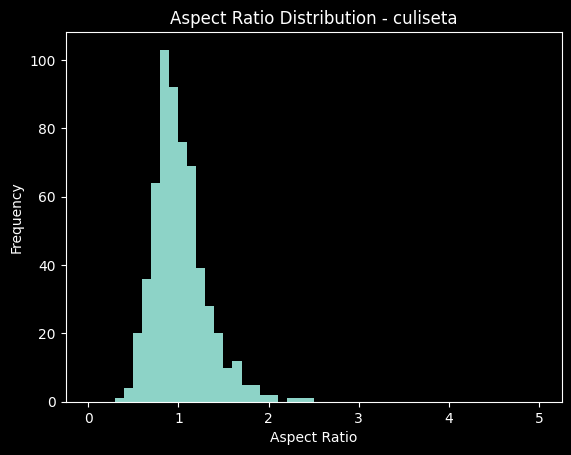

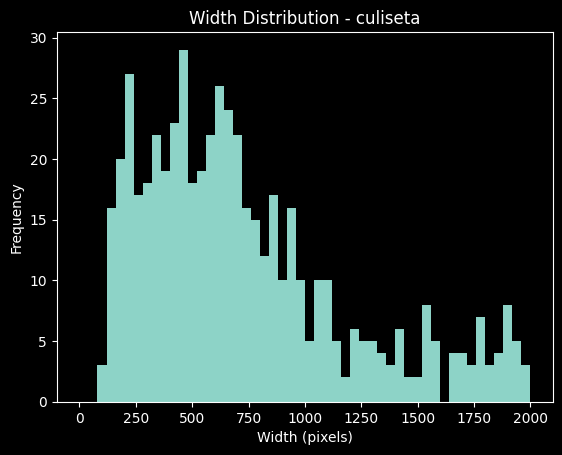

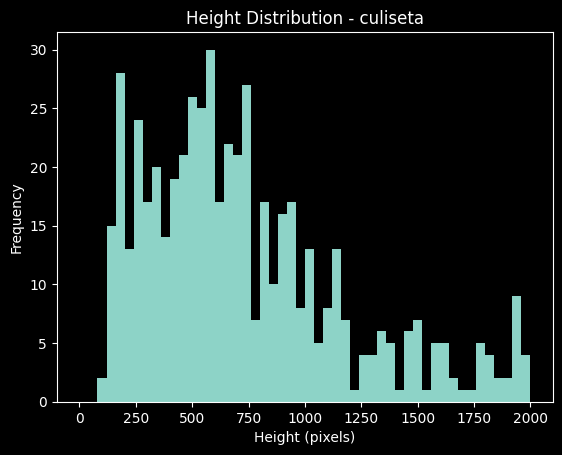

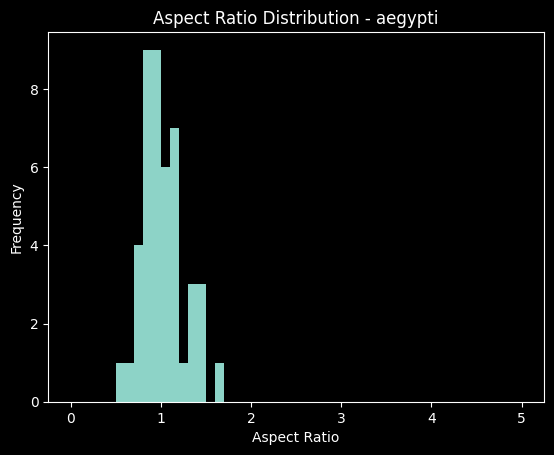

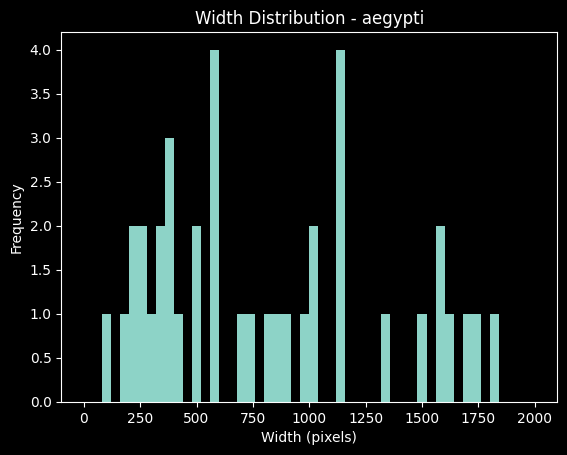

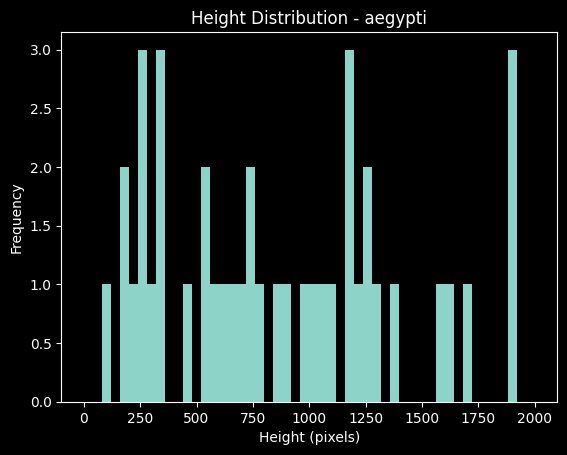

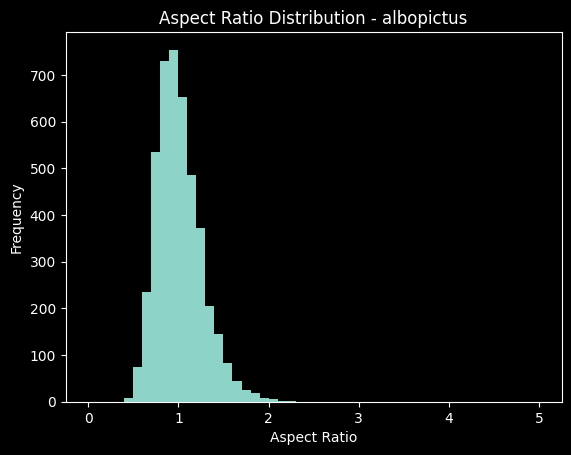

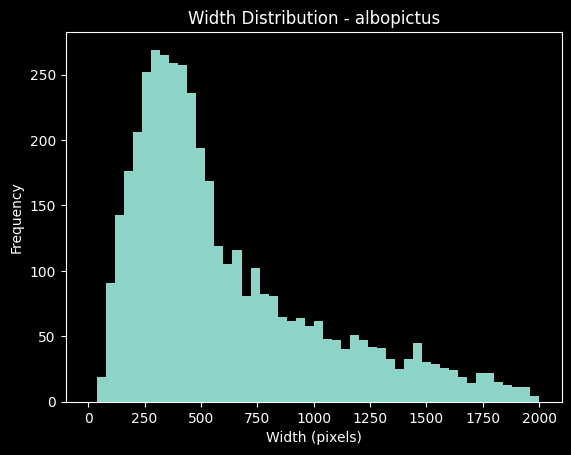

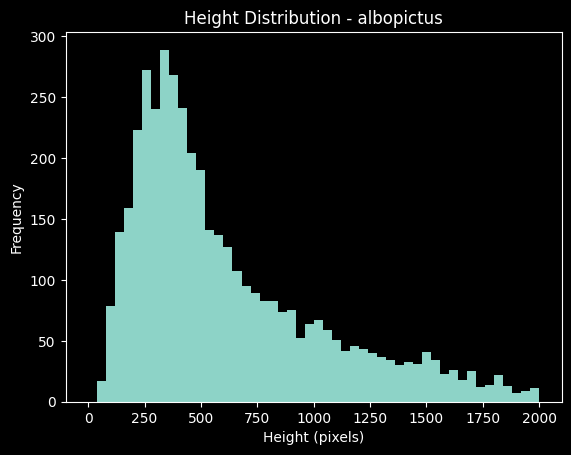

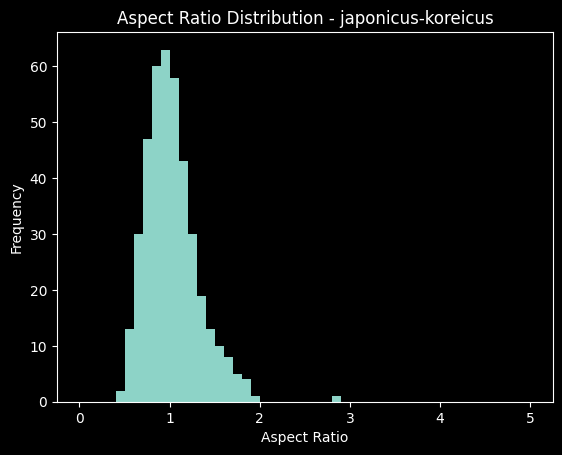

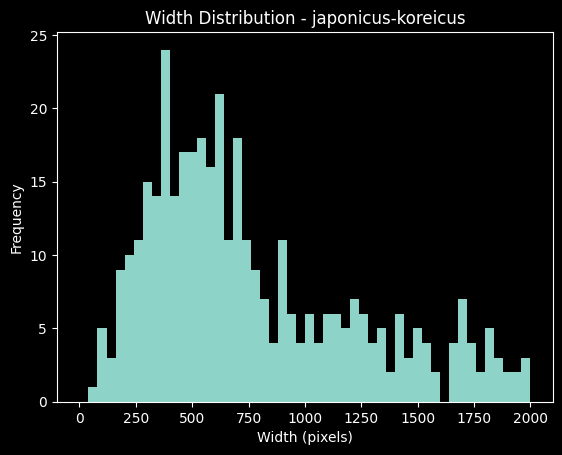

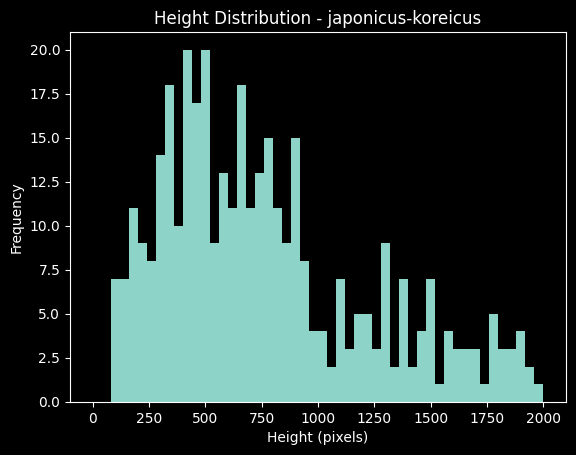

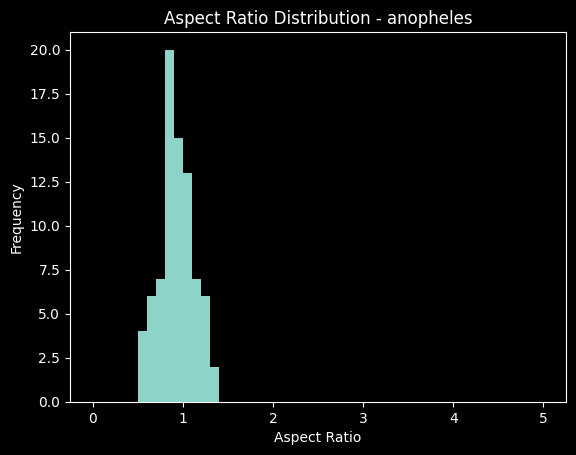

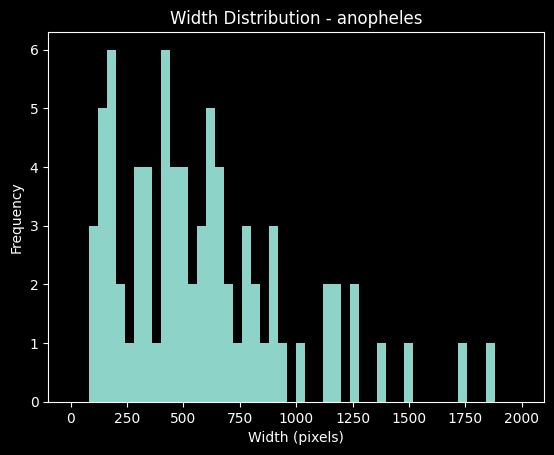

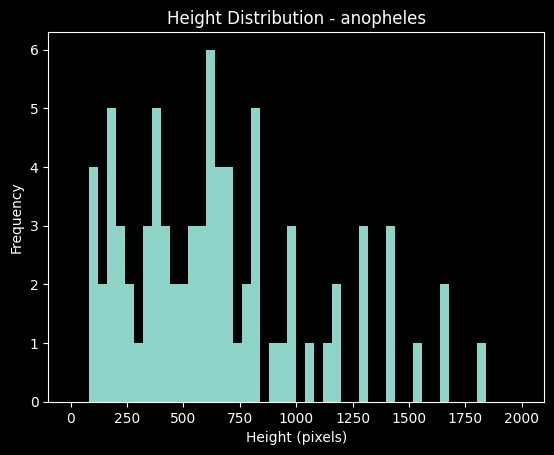

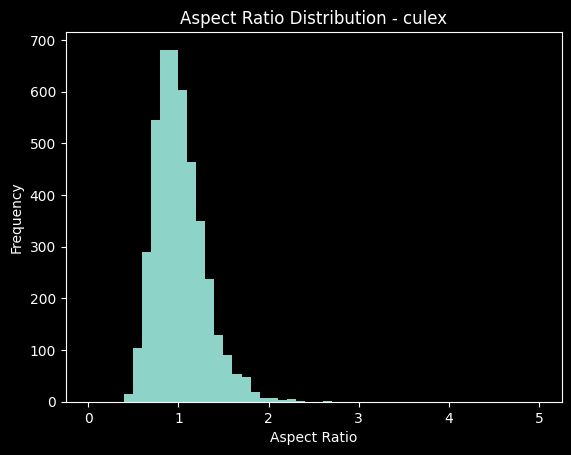

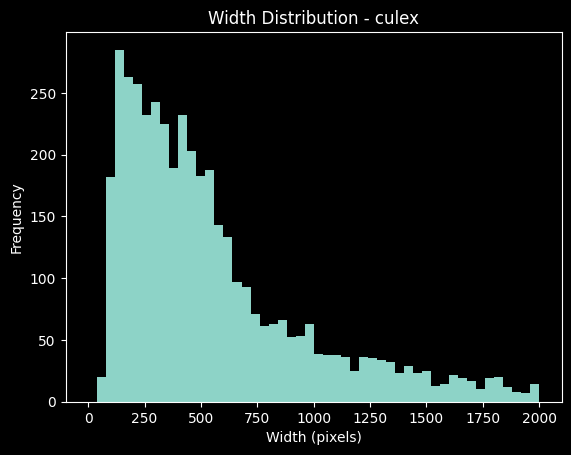

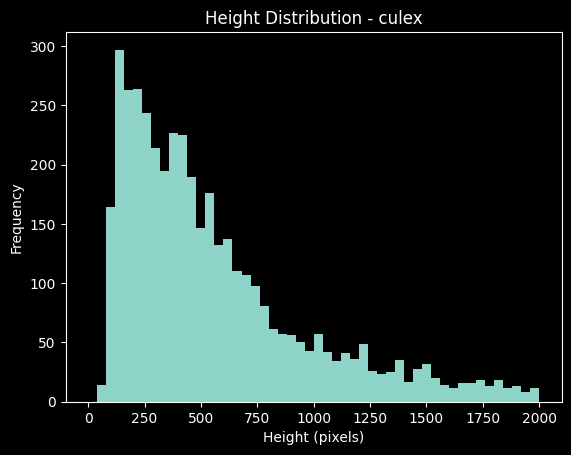

In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Specify the path to your "train" folder
train_folder = "/home/saidinesh/Desktop/Projects/yolov5/datasets/crop-datasets/classify-generated/train"

# Dictionary to store data for each class
class_data = {}

# Loop through the images in the folder, read each image, and calculate the aspect ratio, width, and height
for class_name in os.listdir(train_folder):
    class_path = os.path.join(train_folder, class_name)
    if os.path.isdir(class_path):
        aspect_ratios = []
        widths = []
        heights = []
        for image_name in os.listdir(class_path):
            image_path = os.path.join(class_path, image_name)
            if image_path.endswith(('.jpg', '.jpeg', '.png', '.bmp')):
                image = cv2.imread(image_path)
                if image is not None:
                    h, w, _ = image.shape
                    aspect_ratio = w / h
                    aspect_ratios.append(aspect_ratio)
                    widths.append(w)
                    heights.append(h)
        # Store data for each class in the dictionary
        class_data[class_name] = {
            "aspect_ratios": aspect_ratios,
            "widths": widths,
            "heights": heights
        }

# Plot histograms for each class
for class_name, data in class_data.items():
    # Plot histogram of aspect ratios
    plt.hist(data["aspect_ratios"], bins=50, range=(0, 5))
    plt.title(f"Aspect Ratio Distribution - {class_name}")
    plt.xlabel("Aspect Ratio")
    plt.ylabel("Frequency")
    plt.show()

    # Plot histogram of widths
    plt.hist(data["widths"], bins=50, range=(0, 2000))
    plt.title(f"Width Distribution - {class_name}")
    plt.xlabel("Width (pixels)")
    plt.ylabel("Frequency")
    plt.show()

    # Plot histogram of heights
    plt.hist(data["heights"], bins=50, range=(0, 2000))
    plt.title(f"Height Distribution - {class_name}")
    plt.xlabel("Height (pixels)")
    plt.ylabel("Frequency")
    plt.show()

## Pandas EDA

In [7]:
import os
import cv2
import numpy as np
import pandas as pd

# Specify the path to your "train" folder
train_folder = "/home/saidinesh/Desktop/Projects/yolov5/datasets/crop-datasets/ensemble1/classify-generated-all"

# List to store class-wise data
class_data = []

# Loop through the images in the folder, read each image, and calculate the aspect ratio, width, and height
for class_name in os.listdir(train_folder):
    class_path = os.path.join(train_folder, class_name)
    if os.path.isdir(class_path):
        aspect_ratios = []
        widths = []
        heights = []
        for image_name in os.listdir(class_path):
            image_path = os.path.join(class_path, image_name)
            if image_path.endswith(('.jpg', '.jpeg', '.png', '.bmp')):
                image = cv2.imread(image_path)
                if image is not None:
                    h, w, _ = image.shape
                    aspect_ratio = w / h
                    aspect_ratios.append(aspect_ratio)
                    widths.append(w)
                    heights.append(h)
        # Calculate mean, max, and other statistics
        mean_aspect_ratio = np.mean(aspect_ratios)
        max_aspect_ratio = np.max(aspect_ratios)
        min_aspect_ratio = np.min(aspect_ratios)
        mean_width = np.mean(widths)
        max_width = np.max(widths)
        mean_height = np.mean(heights)
        max_height = np.max(heights)
        # Store data in a dictionary
        class_info = {
            "Class": class_name,
            "Mean Aspect Ratio": mean_aspect_ratio,
            "Max Aspect Ratio": max_aspect_ratio,
            "Min Aspect Ratio": min_aspect_ratio,
            "Mean Width": mean_width,
            "Max Width": max_width,
            "Mean Height": mean_height,
            "Max Height": max_height
        }
        class_data.append(class_info)

# Create a Pandas DataFrame
df = pd.DataFrame(class_data)

# Print the DataFrame
print(df)



                Class  Mean Aspect Ratio  Max Aspect Ratio  Min Aspect Ratio  \
0            culiseta           1.017505          2.459627          0.368276   
1             aegypti           1.021968          1.655738          0.538534   
2          albopictus           1.014182          2.421296          0.403766   
3  japonicus-koreicus           1.015505          2.827586          0.417213   
4           anopheles           0.938122          1.392857          0.544462   
5               culex           1.013989          2.623574          0.400651   

   Mean Width  Max Width  Mean Height  Max Height  
0  884.591640       4065   907.274920        6295  
1  981.702128       2546   946.191489        2114  
2  676.742411       5230   689.367953        4804  
3  874.242424       3119   912.272727        4553  
4  625.464286       2122   678.940476        2472  
5  616.407846       3691   630.952005        4054  
                Class  Mean Aspect Ratio  Max Aspect Ratio  Min Aspect Rati

## Waterflow plot

In [ ]:
import os
import cv2
import pandas as pd
import plotly.express as px

# Specify the path to your "train" folder
train_folder = "/home/saidinesh/Desktop/Projects/yolov5/datasets/crop-datasets/ensemble1/classify-generated-all"

# List to store class-wise data
class_data = []

# Loop through the images in the folder, read each image, and calculate the aspect ratio
for class_name in os.listdir(train_folder):
    class_path = os.path.join(train_folder, class_name)
    if os.path.isdir(class_path):
        aspect_ratios = []
        for image_name in os.listdir(class_path):
            image_path = os.path.join(class_path, image_name)
            if image_path.endswith(('.jpg', '.jpeg', '.png', '.bmp')):
                image = cv2.imread(image_path)
                if image is not None:
                    h, w, _ = image.shape
                    aspect_ratio = w / h
                    aspect_ratios.append(aspect_ratio)
        # Calculate min and max aspect ratios for the class
        min_aspect_ratio = min(aspect_ratios)
        max_aspect_ratio = max(aspect_ratios)
        # Store data in a dictionary
        class_info = {
            "Class": class_name,
            "Min Aspect Ratio": min_aspect_ratio,
            "Max Aspect Ratio": max_aspect_ratio
        }
        class_data.append(class_info)

# Create a Pandas DataFrame
df = pd.DataFrame(class_data)

# Create interactive waterfall plot for each class using Plotly Express
for index, row in df.iterrows():
    aspect_ratios = sorted([ratio for ratio in aspect_ratios if ratio >= row["Min Aspect Ratio"] and ratio <= row["Max Aspect Ratio"]])
    percentage = np.arange(1, len(aspect_ratios) + 1) / len(aspect_ratios) * 100
    data = pd.DataFrame({'Aspect Ratio': aspect_ratios, 'Percentage of Images': percentage})
    fig = px.line(data, x='Aspect Ratio', y='Percentage of Images', title=f"Interactive Waterfall Plot - {row['Class']}")
    fig.show()


## Predictions Threshold

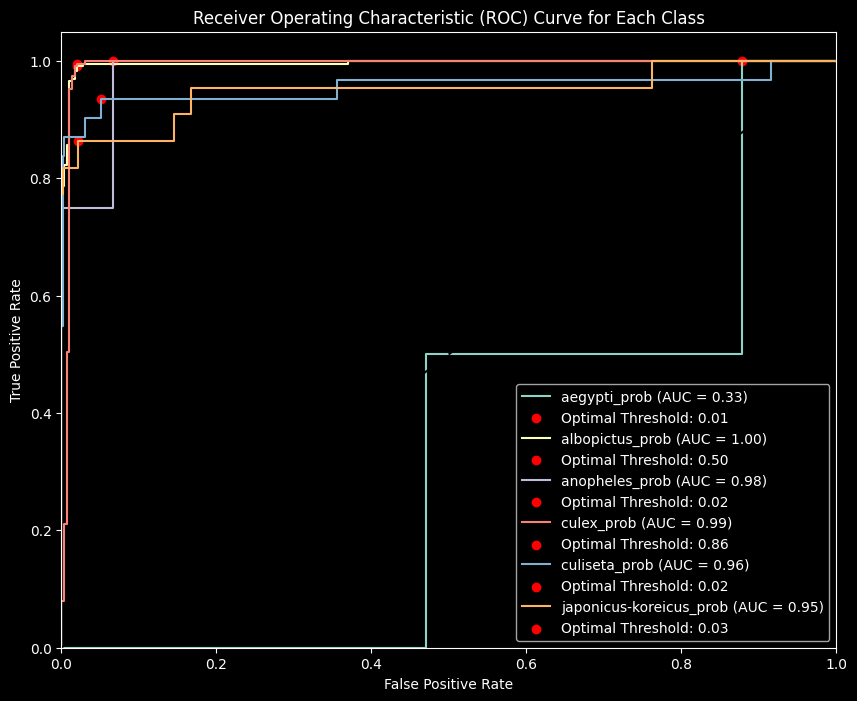

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Assuming pred_df is your prediction DataFrame
class_labels_probs = ["aegypti_prob", "albopictus_prob", "anopheles_prob", 
                "culex_prob", "culiseta_prob", "japonicus-koreicus_prob"]
class_labels = ["aegypti", "albopictus", "anopheles", 
                "culex", "culiseta", "japonicus-koreicus"]

# Binarize the true class labels
y_true = label_binarize(pred_df["org_class_name"], classes=class_labels)

plt.figure(figsize=(10, 8))

for i, label in enumerate(class_labels_probs):
    fpr, tpr, thresholds = roc_curve(y_true[:, i], pred_df[label])
    roc_auc = auc(fpr, tpr)
    
    # Find optimal threshold (Youden's J statistic)
    optimal_threshold = thresholds[np.argmax(tpr - fpr)]
    
    # Plot ROC curve
    plt.plot(fpr, tpr, label=f'{label} (AUC = {roc_auc:.2f})')

    # Plot optimal threshold
    plt.scatter(fpr[np.argmax(tpr - fpr)], tpr[np.argmax(tpr - fpr)], marker='o', color='r', label=f'Optimal Threshold: {optimal_threshold:.2f}')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Each Class')
plt.legend(loc="lower right")
plt.show()

## All-classes  data EDA

Average Aspect Ratio: 1.01
Average Width: 672.11 pixels
Average Height: 686.75 pixels


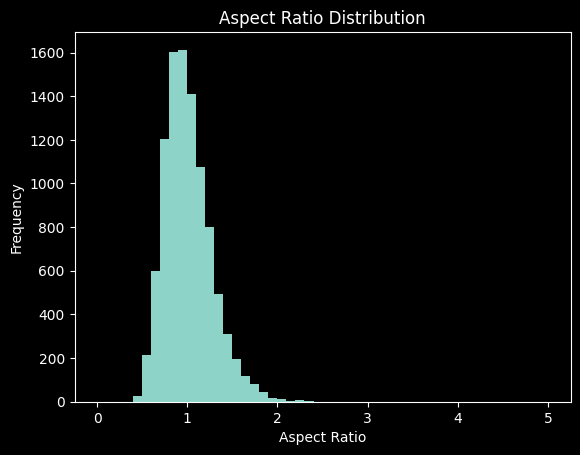

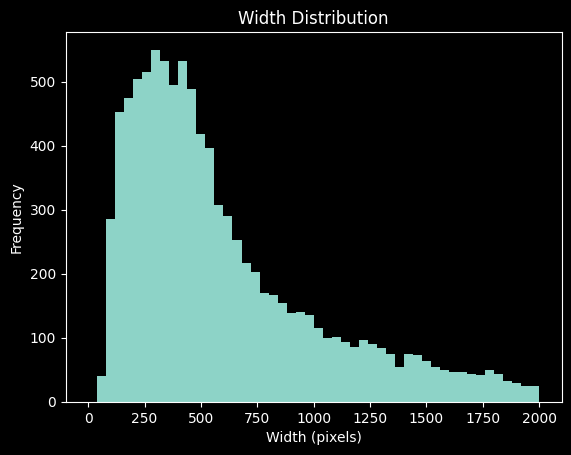

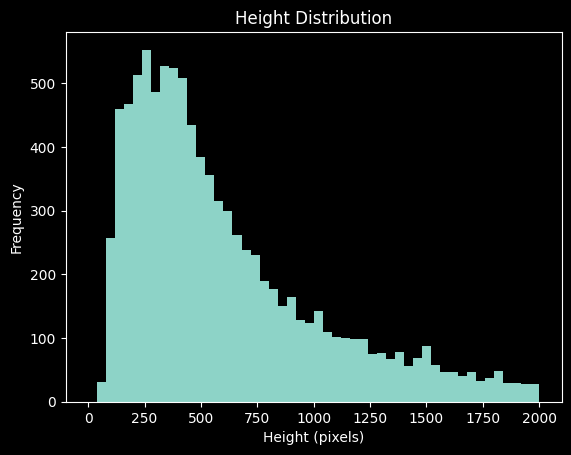

In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Specify the path to your "train" folder
train_folder = "/home/saidinesh/Desktop/Projects/yolov5/datasets/crop-datasets/classify-generated/train"

# Initialize variables to keep track of aspect ratio, width, and height
aspect_ratios = []
widths = []
heights = []

# Loop through the images in the folder, read each image, and calculate the aspect ratio, width, and height
for class_name in os.listdir(train_folder):
    class_path = os.path.join(train_folder, class_name)
    if os.path.isdir(class_path):
        for image_name in os.listdir(class_path):
            image_path = os.path.join(class_path, image_name)
            if image_path.endswith(('.jpg', '.jpeg', '.png', '.bmp')):
                image = cv2.imread(image_path)
                if image is not None:
                    h, w, _ = image.shape
                    aspect_ratio = w / h
                    aspect_ratios.append(aspect_ratio)
                    widths.append(w)
                    heights.append(h)

# Calculate the average aspect ratio, average width, and average height
avg_aspect_ratio = np.mean(aspect_ratios)
avg_width = np.mean(widths)
avg_height = np.mean(heights)

# Print the results
print(f"Average Aspect Ratio: {avg_aspect_ratio:.2f}")
print(f"Average Width: {avg_width:.2f} pixels")
print(f"Average Height: {avg_height:.2f} pixels")

# Plot histogram of aspect ratios
plt.hist(aspect_ratios, bins=50, range=(0, 5))
plt.title("Aspect Ratio Distribution")
plt.xlabel("Aspect Ratio")
plt.ylabel("Frequency")
plt.show()

# Plot histogram of widths
plt.hist(widths, bins=50, range=(0, 2000))
plt.title("Width Distribution")
plt.xlabel("Width (pixels)")
plt.ylabel("Frequency")
plt.show()

# Plot histogram of heights
plt.hist(heights, bins=50, range=(0, 2000))
plt.title("Height Distribution")
plt.xlabel("Height (pixels)")
plt.ylabel("Frequency")
plt.show()


# Setup

Clone GitHub [repository](https://github.com/ultralytics/yolov5), install [dependencies](https://github.com/ultralytics/yolov5/blob/master/requirements.txt) and check PyTorch and GPU.

In [ ]:
import os
import random
import shutil

# Source directories
source_dirs = [
    '/home/saidinesh/Desktop/Projects/yolov5/datasets/crop-datasets/roboflow-sampling/train/albopictus',
    '/home/saidinesh/Desktop/Projects/yolov5/datasets/crop-datasets/roboflow-sampling/train/culex'
]

# Destination directory
destination_root_dir = '/home/saidinesh/Desktop/Projects/yolov5/datasets/crop-datasets/random_samples'

# Percentage of images to move (20%)
percentage_to_move = 20

# Create the destination directories if they don't exist
os.makedirs(destination_root_dir, exist_ok=True)

# Function to move a random percentage of files from source to destination
def move_random_files(source_dir, destination_dir, percentage):
    files = os.listdir(source_dir)
    num_files_to_move = int(len(files) * (percentage / 100))
    
    if num_files_to_move > 0:
        random_files = random.sample(files, num_files_to_move)
        for file in random_files:
            source_path = os.path.join(source_dir, file)
            destination_path = os.path.join(destination_dir, file)
            shutil.move(source_path, destination_path)
            print(f"Moved: {file}")

# Loop through source directories and move random files to separate folders
for source_dir in source_dirs:
    class_name = os.path.basename(source_dir)
    destination_dir = os.path.join(destination_root_dir, class_name)
    os.makedirs(destination_dir, exist_ok=True)
    move_random_files(source_dir, destination_dir, percentage_to_move)

print(f"Moved {percentage_to_move}% of images from source directories to separate class folders in {destination_root_dir}.")


In [ ]:
!git clone https://github.com/ultralytics/yolov5  # clone
%cd yolov5
%pip install -qr requirements.txt comet_ml  # install

import torch
import utils
display = utils.notebook_init()  # checks

YOLOv5 🚀 v7.0-136-g71244ae Python-3.9.16 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)


Setup complete ✅ (2 CPUs, 12.7 GB RAM, 23.3/166.8 GB disk)


In [ ]:
!python detect.py --weights yolov5s.pt --img 640 --conf 0.25 --source data/images
# display.Image(filename='runs/detect/exp/zidane.jpg', width=600)

detect: weights=['yolov5s.pt'], source=data/images, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-136-g71244ae Python-3.9.16 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)

100% 14.1M/14.1M [00:00<00:00, 24.5MB/s]

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
image 1/2 /content/yolov5/data/images/bus.jpg: 640x480 4 persons, 1 bus, 41.5ms
image 2/2 /content/yolov5/data/images/zidane.jpg: 384x640 2 persons, 2 ties, 60.0ms
Speed: 0.5ms pre-process, 50.8ms inference, 37.7ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp


&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
<img align="left" src="https://user-images.githubusercontent.com/26833433/127574988-6a558aa1-d268-44b9-bf6b-62d4c605cc72.jpg" width="600">

In [ ]:
# Download COCO val
torch.hub.download_url_to_file('https://ultralytics.com/assets/coco2017val.zip', 'tmp.zip')  # download (780M - 5000 images)
!unzip -q tmp.zip -d ../datasets && rm tmp.zip  # unzip

100%|██████████| 780M/780M [00:12<00:00, 66.6MB/s]


In [ ]:
# Validate YOLOv5s on COCO val
!python val.py --weights yolov5s.pt --data coco.yaml --img 640 --half

val: data=/content/yolov5/data/coco.yaml, weights=['yolov5s.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.6, max_det=300, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=True, project=runs/val, name=exp, exist_ok=False, half=True, dnn=False
YOLOv5 🚀 v7.0-136-g71244ae Python-3.9.16 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
val: Scanning /content/datasets/coco/val2017... 4952 images, 48 backgrounds, 0 corrupt: 100% 5000/5000 [00:02<00:00, 2024.59it/s]
val: New cache created: /content/datasets/coco/val2017.cache
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100% 157/157 [01:25<00:00,  1.84it/s]
                   all       5000      36335      0.671      0.519      0.566      0.371
Speed: 0.1ms pre-process, 3.1ms inference, 2.3ms NMS per image at shape (32,

In [ ]:
#@title Select YOLOv5 🚀 logger {run: 'auto'}
logger = 'Comet' #@param ['Comet', 'ClearML', 'TensorBoard']

if logger == 'Comet':
  %pip install -q comet_ml
  import comet_ml; comet_ml.init()
elif logger == 'ClearML':
  %pip install -q clearml
  import clearml; clearml.browser_login()
elif logger == 'TensorBoard':
  %load_ext tensorboard
  %tensorboard --logdir runs/train

# 4. Visualize

## Comet Logging and Visualization 🌟 NEW

[Comet](https://www.comet.com/site/lp/yolov5-with-comet/?utm_source=yolov5&utm_medium=partner&utm_campaign=partner_yolov5_2022&utm_content=yolov5_colab) is now fully integrated with YOLOv5. Track and visualize model metrics in real time, save your hyperparameters, datasets, and model checkpoints, and visualize your model predictions with [Comet Custom Panels](https://www.comet.com/docs/v2/guides/comet-dashboard/code-panels/about-panels/?utm_source=yolov5&utm_medium=partner&utm_campaign=partner_yolov5_2022&utm_content=yolov5_colab)! Comet makes sure you never lose track of your work and makes it easy to share results and collaborate across teams of all sizes!

Getting started is easy:
```shell
pip install comet_ml  # 1. install
export COMET_API_KEY=<Your API Key>  # 2. paste API key
python train.py --img 640 --epochs 3 --data coco128.yaml --weights yolov5s.pt  # 3. train
```
To learn more about all of the supported Comet features for this integration, check out the [Comet Tutorial](https://docs.ultralytics.com/yolov5/tutorials/comet_logging_integration). If you'd like to learn more about Comet, head over to our [documentation](https://www.comet.com/docs/v2/?utm_source=yolov5&utm_medium=partner&utm_campaign=partner_yolov5_2022&utm_content=yolov5_colab). Get started by trying out the Comet Colab Notebook:
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1RG0WOQyxlDlo5Km8GogJpIEJlg_5lyYO?usp=sharing)

<a href="https://bit.ly/yolov5-readme-comet2">
<img alt="Comet Dashboard" src="https://user-images.githubusercontent.com/26833433/202851203-164e94e1-2238-46dd-91f8-de020e9d6b41.png" width="1280"/></a>

## ClearML Logging and Automation 🌟 NEW

[ClearML](https://cutt.ly/yolov5-notebook-clearml) is completely integrated into YOLOv5 to track your experimentation, manage dataset versions and even remotely execute training runs. To enable ClearML (check cells above):

- `pip install clearml`
- run `clearml-init` to connect to a ClearML server (**deploy your own [open-source server](https://github.com/allegroai/clearml-server)**, or use our [free hosted server](https://cutt.ly/yolov5-notebook-clearml))

You'll get all the great expected features from an experiment manager: live updates, model upload, experiment comparison etc. but ClearML also tracks uncommitted changes and installed packages for example. Thanks to that ClearML Tasks (which is what we call experiments) are also reproducible on different machines! With only 1 extra line, we can schedule a YOLOv5 training task on a queue to be executed by any number of ClearML Agents (workers).

You can use ClearML Data to version your dataset and then pass it to YOLOv5 simply using its unique ID. This will help you keep track of your data without adding extra hassle. Explore the [ClearML Tutorial](https://docs.ultralytics.com/yolov5/tutorials/clearml_logging_integration) for details!

<a href="https://cutt.ly/yolov5-notebook-clearml">
<img alt="ClearML Experiment Management UI" src="https://github.com/thepycoder/clearml_screenshots/raw/main/scalars.jpg" width="1280"/></a>

## Local Logging

Training results are automatically logged with [Tensorboard](https://www.tensorflow.org/tensorboard) and [CSV](https://github.com/ultralytics/yolov5/pull/4148) loggers to `runs/train`, with a new experiment directory created for each new training as `runs/train/exp2`, `runs/train/exp3`, etc.

This directory contains train and val statistics, mosaics, labels, predictions and augmentated mosaics, as well as metrics and charts including precision-recall (PR) curves and confusion matrices.

<img alt="Local logging results" src="https://user-images.githubusercontent.com/26833433/183222430-e1abd1b7-782c-4cde-b04d-ad52926bf818.jpg" width="1280"/>


# Environments

YOLOv5 may be run in any of the following up-to-date verified environments (with all dependencies including [CUDA](https://developer.nvidia.com/cuda)/[CUDNN](https://developer.nvidia.com/cudnn), [Python](https://www.python.org/) and [PyTorch](https://pytorch.org/) preinstalled):

- **Notebooks** with free GPU: <a href="https://bit.ly/yolov5-paperspace-notebook"><img src="https://assets.paperspace.io/img/gradient-badge.svg" alt="Run on Gradient"></a> <a href="https://colab.research.google.com/github/ultralytics/yolov5/blob/master/tutorial.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"></a> <a href="https://www.kaggle.com/ultralytics/yolov5"><img src="https://kaggle.com/static/images/open-in-kaggle.svg" alt="Open In Kaggle"></a>
- **Google Cloud** Deep Learning VM. See [GCP Quickstart Guide](https://docs.ultralytics.com/yolov5/environments/google_cloud_quickstart_tutorial/)
- **Amazon** Deep Learning AMI. See [AWS Quickstart Guide](https://docs.ultralytics.com/yolov5/environments/aws_quickstart_tutorial/)
- **Docker Image**. See [Docker Quickstart Guide](https://docs.ultralytics.com/yolov5/environments/docker_image_quickstart_tutorial/) <a href="https://hub.docker.com/r/ultralytics/yolov5"><img src="https://img.shields.io/docker/pulls/ultralytics/yolov5?logo=docker" alt="Docker Pulls"></a>


# Status

![YOLOv5 CI](https://github.com/ultralytics/yolov5/actions/workflows/ci-testing.yml/badge.svg)

If this badge is green, all [YOLOv5 GitHub Actions](https://github.com/ultralytics/yolov5/actions) Continuous Integration (CI) tests are currently passing. CI tests verify correct operation of YOLOv5 training ([train.py](https://github.com/ultralytics/yolov5/blob/master/train.py)), testing ([val.py](https://github.com/ultralytics/yolov5/blob/master/val.py)), inference ([detect.py](https://github.com/ultralytics/yolov5/blob/master/detect.py)) and export ([export.py](https://github.com/ultralytics/yolov5/blob/master/export.py)) on macOS, Windows, and Ubuntu every 24 hours and on every commit.


# Appendix

Additional content below.

In [ ]:
# YOLOv5 PyTorch HUB Inference (DetectionModels only)
import torch

model = torch.hub.load('ultralytics/yolov5', 'yolov5s', force_reload=True, trust_repo=True)  # or yolov5n - yolov5x6 or custom
im = 'https://ultralytics.com/images/zidane.jpg'  # file, Path, PIL.Image, OpenCV, nparray, list
results = model(im)  # inference
results.print()  # or .show(), .save(), .crop(), .pandas(), etc.